In [2]:
import pandas as pd

In [3]:
dat=pd.read_csv("dm.csv")
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [4]:
dat.head()

Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  AmountSpent  Cust_Id  
0         6          755      247  
1         6         1318      127  
2        18          296      479  
3        18         2436      475  
4        12         1304      151

In [5]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)

In [6]:
X.head()

Age  Gender OwnHome  Married Location  Salary  Children History  \
0     Old  Female     Own   Single      Far   47500         0    High   
1  Middle    Male    Rent   Single    Close   63600         0    High   
2   Young  Female    Rent   Single    Close   13500         0     Low   
3  Middle    Male     Own  Married    Close   85600         1    High   
4  Middle  Female     Own   Single    Close   68400         0    High   

   Catalogs  
0         6  
1         6  
2        18  
3        18  
4        12

In [7]:
X=pd.get_dummies(X)

In [8]:
X.head()

Salary  Children  Catalogs  Age_Middle  Age_Old  Age_Young  Gender_Female  \
0   47500         0         6           0        1          0              1   
1   63600         0         6           1        0          0              0   
2   13500         0        18           0        0          1              1   
3   85600         1        18           1        0          0              0   
4   68400         0        12           1        0          0              1   

   Gender_Male  OwnHome_Own  OwnHome_Rent  Married_Married  Married_Single  \
0            0            1             0                0               1   
1            1            0             1                0               1   
2            0            0             1                0               1   
3            1            1             0                1               0   
4            0            1             0                0               1   

   Location_Close  Location_Far  History_High  History_Low  History_Medium  
0               0             1             1            0               0  
1               1             0             1            0               0  
2               1             0             0            1               0  
3               1             0             1            0               0  
4               1             0             1            0               0

In [9]:
y=dat['AmountSpent']

In [10]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [11]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(criterion='mse', max_depth=8,random_state=200)
reg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=200, splitter='best')

In [37]:
reg.score(X_test,y_test)

0.7911268803716899

In [12]:
reg.feature_importances_

array([5.81462712e-01, 3.05606867e-02, 1.67290446e-01, 3.09871163e-04,
       1.85409983e-03, 5.56823396e-04, 6.94111490e-03, 4.62186137e-04,
       5.36906857e-04, 0.00000000e+00, 2.61445579e-03, 4.46398404e-04,
       2.43145520e-02, 2.61786584e-02, 3.19362232e-02, 5.52022578e-02,
       6.93326074e-02])

In [14]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)

Salary             0.581463
Catalogs           0.167290
History_Medium     0.069333
History_Low        0.055202
History_High       0.031936
Children           0.030561
Location_Far       0.026179
Location_Close     0.024315
Gender_Female      0.006941
Married_Married    0.002614
Age_Old            0.001854
Age_Young          0.000557
OwnHome_Own        0.000537
Gender_Male        0.000462
Married_Single     0.000446
Age_Middle         0.000310
OwnHome_Rent       0.000000
dtype: float64

In [15]:
mod=tree.DecisionTreeRegressor(max_depth=3)
mod=model_selection.GridSearchCV(reg,param_grid={'max_depth':[3,4,5,6,7,8,9,10,15,20,25,50,60,80,100], 'min_samples_leaf':[1,2,3]  }, cv = 3)
mod.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=8, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=200,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50,
                                       60, 80, 100],
                         '

In [17]:
mod.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=200, splitter='best')

In [18]:
mod.best_score_

0.7212403014583582

In [15]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 

In [16]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

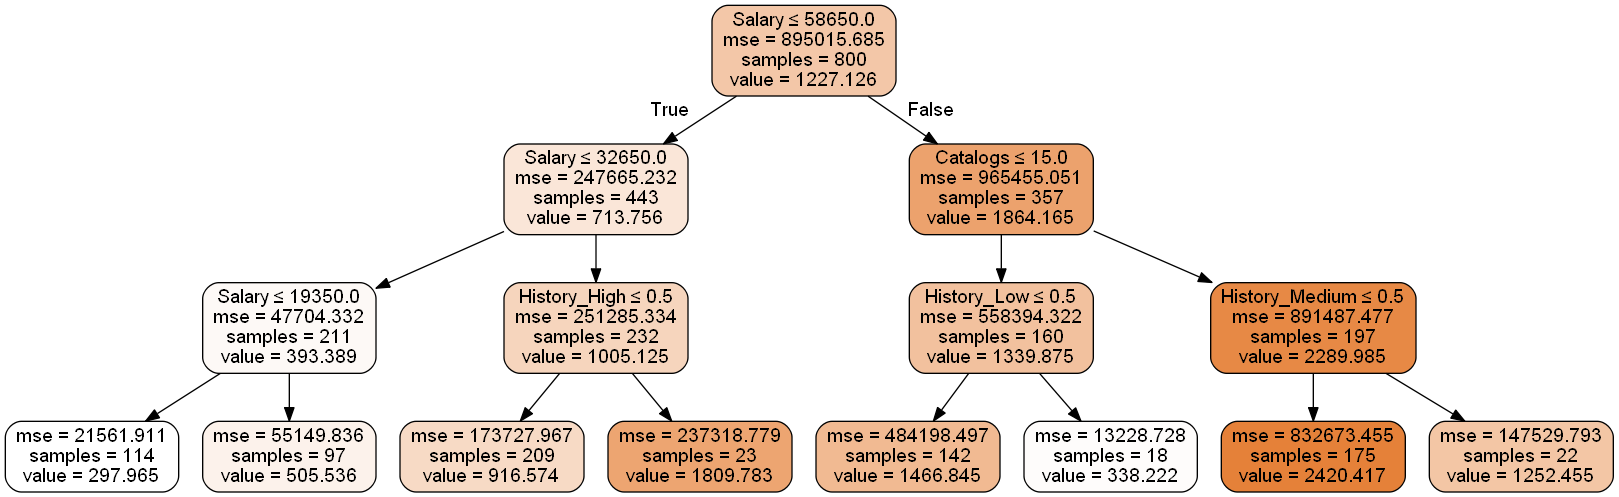

In [17]:
from IPython.display import Image
Image(graph.create_png())